This example implements the first model from "Modeling civil violence: An agent-based computational approach," by Joshua Epstein.  The paper (pdf) can be found [here](http://www.uvm.edu/~pdodds/files/papers/others/2002/epstein2002a.pdf).

The model consists of two types of agents: "Citizens" (called "Agents" in the paper) and "Cops."  Agents decide whether or not to rebel by weighing their unhappiness ('grievance') against the risk of rebelling, which they estimate by comparing the local ratio of rebels to cops.  




In [34]:
%matplotlib inline

from epstein_civil_violence.model import EpsteinCivilViolence

In [38]:
model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=8,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=200,
)  # cap the number of steps the model takes
model.run_model()

    # def __init__(
    #     self,
    #     width=40,
    #     height=40,
    #     citizen_density=0.7,
    #     cop_density=0.074,
    #     citizen_vision=7,
    #     cop_vision=7,
    #     legitimacy=0.8,
    #     max_jail_term=1000,
    #     active_threshold=0.1,
    #     arrest_prob_constant=2.3,
    #     movement=True,
    #     max_iters=1000,
    # )

The model's data collector counts the number of citizens who are Active (in rebellion), Jailed, or Quiescent after each step.

In [39]:
model_out = model.datacollector.get_model_vars_dataframe()

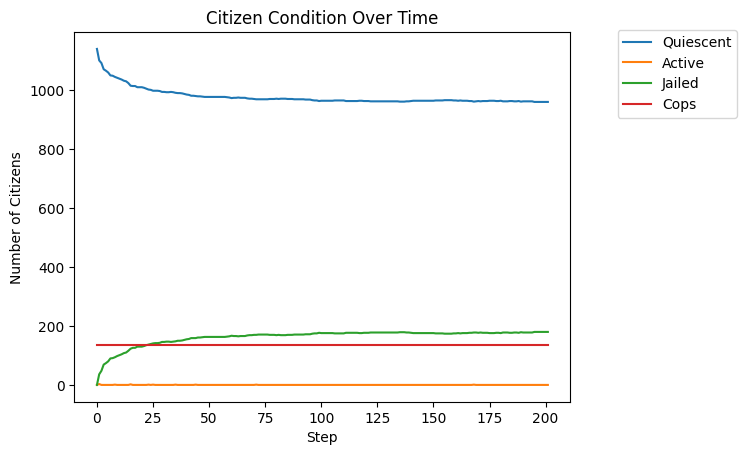

In [40]:
ax = model_out.plot()
ax.set_title("Citizen Condition Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Citizens")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [37]:
### Low legitimacy, high efficiency

model2 = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=7,
    legitimacy=0.3,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
) 


In [38]:
model_out2 = model2.datacollector.get_model_vars_dataframe()

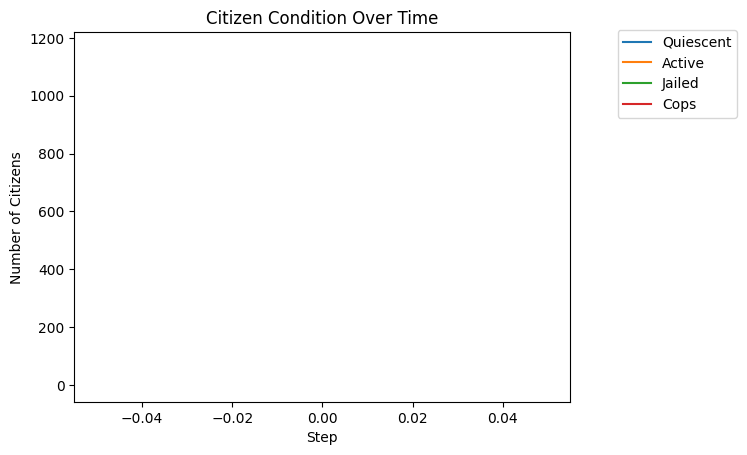

In [39]:
ax = model_out2.plot()
ax.set_title("Citizen Condition Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Citizens")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [28]:
#### Low legitimacy low cop efficiency

model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=7,
    legitimacy=0.2,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
) 